In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [36]:
df = pd.read_csv('Salary Data.csv')

In [37]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [38]:
x = df['YearsExperience']
y = df['Salary']

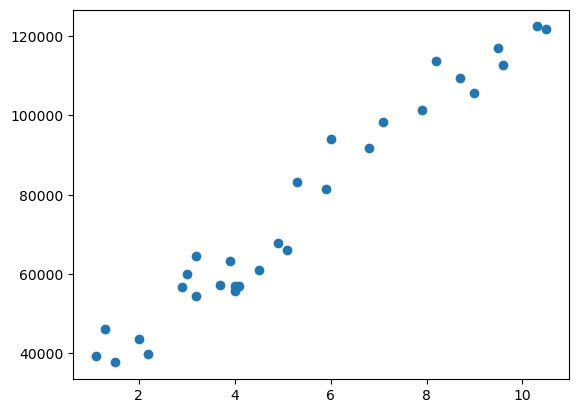

In [39]:
plt.scatter(x,y)

In [40]:
X = df.drop(['Salary'],axis = 'columns')
Y = df['Salary']

In [41]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [42]:
Y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [43]:
model = LinearRegression()
model.fit(X.values,Y.values)
model.score(X.values,Y.values)

0.9569566641435086

In [44]:
model.predict([[2.3]])

array([47527.11353802])

In [10]:
y_pred = model.predict(X.values)
y_pred

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [11]:
print(mae(Y.values,y_pred))
print(mse(Y.values,y_pred))

4644.2012894435375
31270951.722280968


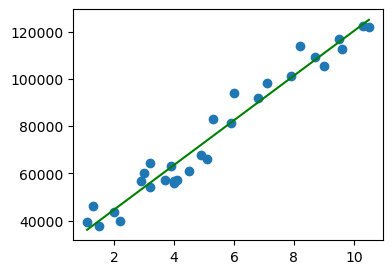

In [12]:
plt.figure(figsize=(4,3))
plt.scatter(X,Y)
plt.plot(X,model.predict(X.values),color='g')
plt.show()

In [13]:
print(model.intercept_)

25792.20019866871


In [14]:
print(model.coef_)

[9449.96232146]


# MULTIPLE REGRESSION

In [46]:
df = pd.read_csv('data.csv')

In [47]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [59]:
x = df.drop(['price','country','statezip','yr_renovated'],axis ='columns')
y = df['price']

In [71]:
df['country'].value_counts()

USA    4600
Name: country, dtype: int64

In [61]:
x

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,street,city
0,2014-05-02 00:00:00,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,18810 Densmore Ave N,Shoreline
1,2014-05-02 00:00:00,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,709 W Blaine St,Seattle
2,2014-05-02 00:00:00,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,26206-26214 143rd Ave SE,Kent
3,2014-05-02 00:00:00,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,857 170th Pl NE,Bellevue
4,2014-05-02 00:00:00,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,9105 170th Ave NE,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,501 N 143rd St,Seattle
4596,2014-07-09 00:00:00,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,14855 SE 10th Pl,Bellevue
4597,2014-07-09 00:00:00,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,759 Ilwaco Pl NE,Renton
4598,2014-07-10 00:00:00,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,5148 S Creston St,Seattle


In [62]:
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [63]:
le_date = LabelEncoder()
le_street = LabelEncoder()
le_city = LabelEncoder()
le_zp = LabelEncoder()

In [64]:
x['date'] = le_date.fit_transform(x['date'])
x['street'] = le_street.fit_transform(x['street'])
x['city'] = le_city.fit_transform(x['city'])
#x['statezip'] = le_zp.fit_transform(x['statezip'])


In [65]:
x

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,street,city
0,0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,1522,36
1,0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,3899,35
2,0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,2291,18
3,0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,4263,3
4,0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,4352,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,68,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,3447,35
4596,68,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,960,3
4597,68,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,4033,32
4598,69,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,3498,35


In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [67]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

3220
1380
3220
1380


In [68]:
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.42516798771759934

In [69]:
cm = x.corr()
cm

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,street,city
date,1.000000,0.005762,0.019263,0.029481,-0.020393,0.029607,0.017586,0.005844,0.007853,0.041038,-0.015050,0.001356,-0.005089,-0.020325
bedrooms,0.005762,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.035507,-0.130447
bathrooms,0.019263,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,0.007175,-0.097026
sqft_living,0.029481,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,0.006411,-0.109686
sqft_lot,-0.020393,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.023028,-0.079135
floors,0.029607,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,0.056191,0.078481
waterfront,0.017586,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.035448,0.001450
view,0.005844,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.065077,0.001340
condition,0.007853,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.005480,-0.010592
sqft_above,0.041038,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.013709,-0.121701


<Axes: >

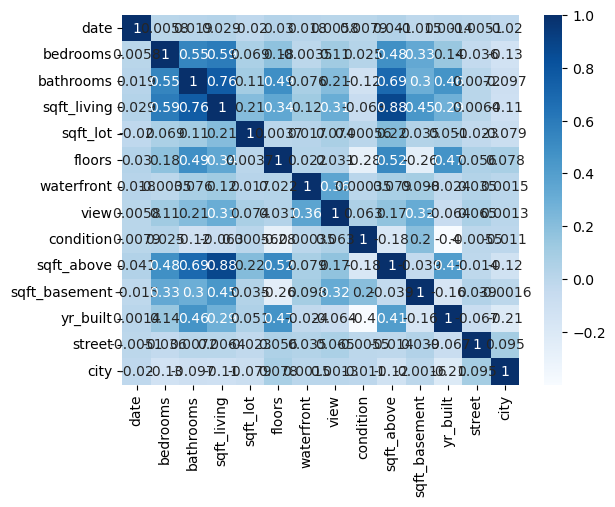

In [70]:
sns.heatmap(data=cm,annot = True, cmap = 'Blues')

In [29]:
y_pred = model.predict(x_test)
y_pred

array([644774.17959601, 293259.5499042 , 526154.49896881, ...,
       412436.89723371, 394130.34915224, 398516.56498683])

In [30]:
print(mae(y_test,y_pred))
print(mse(y_test,y_pred))

164606.4661096867
63679033546.74927
